In [26]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import random

#from ggplot import *
#from scipy.stats import logistic
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, mean_squared_error
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import *
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
#import graphviz
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.svm import SVC, SVR

# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)


In [6]:
import time

def execution_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        hours, rem = divmod(elapsed_time, 3600)
        minutes, seconds = divmod(rem, 60)
        print(f"Execution time for {func.__name__}: {int(hours)}h {int(minutes)}m {seconds:.2f}s")
        return result
    return wrapper

# 데이터 불러오기

In [4]:
DATA_PATH = './dataset/CARD/'
DATA_PATH_2 = './dataset/CUSTOMER/'
card_22_usage = pd.read_csv(DATA_PATH + 'card_22_usage.csv', encoding="utf-8-sig")
customer_22_40 = pd.read_csv(DATA_PATH_2 + 'customer_22_40.csv', encoding="utf-8-sig")
customer_22_50 = pd.read_csv(DATA_PATH_2 + 'customer_22_50.csv', encoding="utf-8-sig")
customer_22_60 = pd.read_csv(DATA_PATH_2 + 'customer_22_60.csv', encoding="utf-8-sig")

# card, customer 데이터 합치기

In [ ]:
#card_customer_22_50_id= pd.merge(customer_22_50, card_22_usage, on='고객ID', how='inner')
#card_customer_22_50_id.head(3)
#card_customer_22_50_id.to_csv('cc_22_50.csv', index=False, encoding='utf-8-sig')

In [5]:
card_customer_22_40_id= pd.merge(customer_22_40, card_22_usage, on='고객ID', how='inner')
card_customer_22_40_id.head(3)
card_customer_22_40_id.to_csv('cc_22_40.csv', index=False, encoding='utf-8-sig')

In [7]:
card_customer_22_50_id= pd.merge(customer_22_50, card_22_usage, on='고객ID', how='inner')
card_customer_22_50_id.head(3)
card_customer_22_50_id.to_csv('cc_22_50.csv', index=False, encoding='utf-8-sig')

In [8]:
card_customer_22_60_id= pd.merge(customer_22_60, card_22_usage, on='고객ID', how='inner')
card_customer_22_60_id.head(3)
card_customer_22_60_id.to_csv('cc_22_60.csv', index=False, encoding='utf-8-sig')

## merge 된 cc데이터 불러오기

In [9]:
DATA_PATH_3 = './dataset/CC/'
cc_22_40 = pd.read_csv(DATA_PATH_3 + 'cc_22_40.csv', encoding="utf-8-sig")
cc_22_50 = pd.read_csv(DATA_PATH_3 + 'cc_22_50.csv', encoding="utf-8-sig")
cc_22_60 = pd.read_csv(DATA_PATH_3 + 'cc_22_60.csv', encoding="utf-8-sig")

In [10]:
cc_22_40.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997364303,202212,이동통신요금,수도권,중구,5번이하,70000
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000
2,9997364303,202212,기타,수도권,성남시 분당구,5번이하,80000
3,9997364303,202212,의료/보험,경상북도,영천시,5번이하,10000
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000


In [11]:
cc_22_50.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9998496340,202212,외식,대구광역시,달성군,5번이하,10000
1,9998496340,202212,외식,대구광역시,달서구,5번이하,10000
2,9998496340,202212,외식,대구광역시,달성군,5번이하,10000
3,9998496340,202212,외식,경상북도,경산시,5번이하,40000
4,9998496340,202212,대형마트,대구광역시,중구,5번이하,10000


In [12]:
cc_22_60.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9999998161,202207,여행/교통,대구광역시,수성구,5번초과 10번이하,50000
1,9999998161,202207,여행/교통,대구광역시,수성구,5번이하,20000
2,9999998161,202206,여행/교통,대구광역시,수성구,5번초과 10번이하,50000
3,9999998161,202206,여행/교통,대구광역시,수성구,5번이하,10000
4,9999998161,202205,여행/교통,대구광역시,수성구,10번초과 15번이하,80000


In [13]:
cc_22_40.describe()

,고객ID,거래년월,승인금액
count,1.407673e+07,1.407673e+07,1.407673e+07
mean,6.940545e+09,2.022067e+05,5.707633e+04
std,1.443581e+09,3.406090e+00,1.500799e+05
min,2.495539e+09,2.022010e+05,1.000000e+04
25%,6.081933e+09,2.022040e+05,1.000000e+04
50%,7.013672e+09,2.022070e+05,2.000000e+04
75%,7.964229e+09,2.022100e+05,5.000000e+04
max,9.997479e+09,2.022120e+05,9.900000e+06


In [14]:
cc_22_40.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14076734 entries, 0 to 14076733
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   고객ID      int64 
 1   거래년월      int64 
 2   가맹점업종명    object
 3   가맹점_광역시도  object
 4   가맹점_시군구   object
 5   승인건수      object
 6   승인금액      int64 
dtypes: int64(3), object(4)
memory usage: 751.8+ MB


In [15]:
cc_22_40_sort = cc_22_40.sort_values(by=['고객ID'], ascending=[True])
cc_22_40_sort.head(10)

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
12411895,2495538891,202212,외식,경상북도,구미시,5번이하,40000
12411892,2495538891,202212,음식료품,경상북도,구미시,5번이하,30000
12411891,2495538891,202212,편의점,경상북도,구미시,5번이하,30000
12411894,2495538891,202212,외식,경상북도,구미시,5번이하,30000
12411893,2495538891,202212,외식,경상북도,구미시,5번이하,30000
12411896,2495538891,202212,외식,경상북도,구미시,5번이하,30000
12411890,2498441406,202212,외식,대구광역시,북구,5번이하,20000
12411889,2504262328,202212,의료/보험,경상북도,구미시,5번이하,400000
12411887,2508835140,202212,외식,영남권,북구,5번이하,10000
12411886,2508835140,202212,주유,영남권,북구,5번이하,10000


In [16]:
cc_22_40_sort = cc_22_40.sort_values(by=['고객ID', '가맹점업종명'], ascending=[True, True])
cc_22_40_sort.head(10)

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
12411893,2495538891,202212,외식,경상북도,구미시,5번이하,30000
12411894,2495538891,202212,외식,경상북도,구미시,5번이하,30000
12411895,2495538891,202212,외식,경상북도,구미시,5번이하,40000
12411896,2495538891,202212,외식,경상북도,구미시,5번이하,30000
12411892,2495538891,202212,음식료품,경상북도,구미시,5번이하,30000
12411891,2495538891,202212,편의점,경상북도,구미시,5번이하,30000
12411890,2498441406,202212,외식,대구광역시,북구,5번이하,20000
12411889,2504262328,202212,의료/보험,경상북도,구미시,5번이하,400000
12411887,2508835140,202212,외식,영남권,북구,5번이하,10000
12411888,2508835140,202212,외식,영남권,북구,5번이하,40000


### 고객ID와 가맹점업종명으로 그룹화하여 승인금액을 합산

In [17]:
cc_22_40_amount = cc_22_40.groupby(['고객ID', '가맹점업종명'], as_index=False)['승인금액'].sum()
cc_22_40_amount.head(10)

,고객ID,가맹점업종명,승인금액
0,2495538891,외식,130000
1,2495538891,음식료품,30000
2,2495538891,편의점,30000
3,2498441406,외식,20000
4,2504262328,의료/보험,400000
5,2508835140,외식,50000
6,2508835140,주유,10000
7,2510881693,외식,40000
8,2511835803,대형마트,30000
9,2511835803,음식료품,20000


### 가맹점업종명별 승인금액 합계 계산

In [24]:
total_amounts_22_40 = cc_22_40.groupby('가맹점업종명')['승인금액'].sum().reset_index()
total_amounts_22_40.head()

,가맹점업종명,승인금액
0,간편결제,128056630000
1,교육/학원,23325330000
2,기타,140576130000
3,대형마트,94916950000
4,문화생활,1789450000


In [27]:
total_amounts_22_50 = cc_22_50.groupby('가맹점업종명')['승인금액'].sum().reset_index()
total_amounts_22_50.head()

,가맹점업종명,승인금액
0,간편결제,99657260000
1,교육/학원,8290550000
2,기타,164775280000
3,대형마트,134933360000
4,문화생활,1420520000


### 승인금액 합계를 기준으로 내림차순 정렬

In [25]:
total_amounts_22_sorted_40 = total_amounts_22.sort_values(by='승인금액', ascending=False)
total_amounts_22_sorted_40.head()

,가맹점업종명,승인금액
2,기타,140576130000
0,간편결제,128056630000
10,외식,121026320000
3,대형마트,94916950000
12,의료/보험,78219220000


In [44]:
def amount_generation(df, year ,generation):
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby('가맹점업종명')['승인금액'].sum().reset_index()
    total_amounts = total_amounts.sort_values(by='승인금액', ascending=False)
    ax = sns.barplot(x='가맹점업종명', y='승인금액', data=total_amounts, palette="viridis")
    ax.set_title(f"{year}년도 {generation}대 업종별 승인금액 합계")
    ax.set_xlabel("업종")
    ax.set_ylabel("승인금액 합계")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e12:.2f}조',  # 조 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 조 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
plt.show()

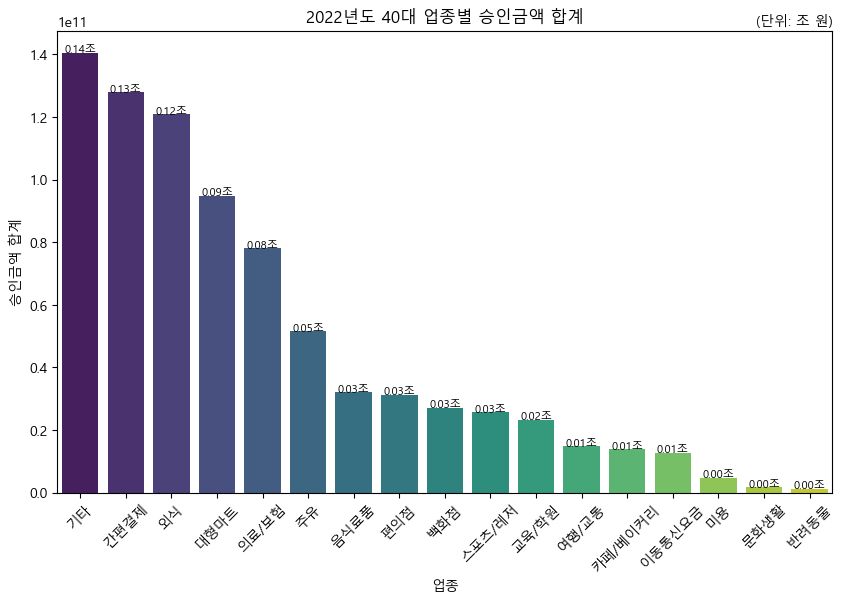

In [45]:
amount_generation(cc_22_40, "2022", "40")

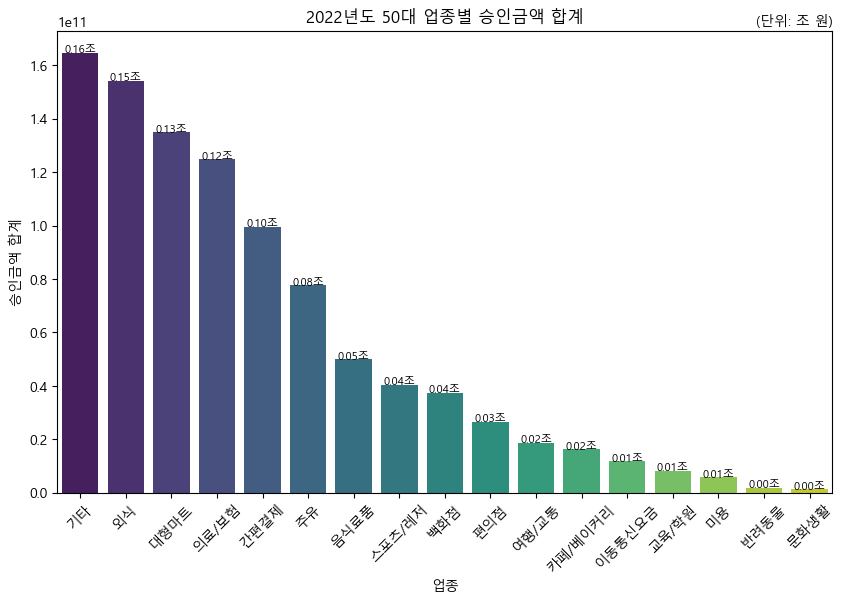

In [46]:
amount_generation(cc_22_50, "2022", "50")

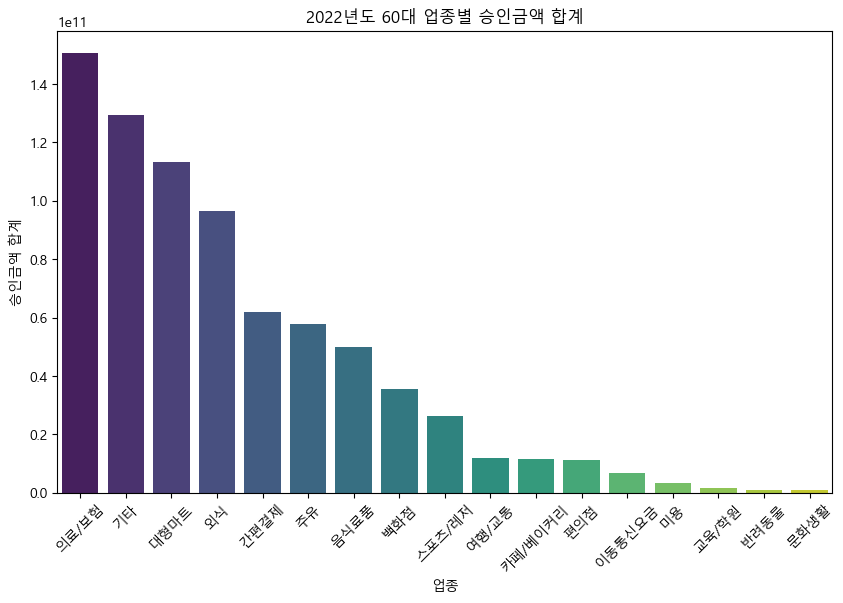

In [36]:
amount_generation(cc_22_60, "2022", "60")

In [ ]:
amount_generation()

In [37]:
# 가맹점업종명별 승인금액 합계 계산
total_amounts_40 = cc_22_40.groupby('가맹점업종명')['승인금액'].sum().reset_index()
# 결과 출력
print(total_amounts_40)
#이거 40, 50, 60대 하나씩 돌려주세여

     가맹점업종명          승인금액
0      간편결제  128056630000
1     교육/학원   23325330000
2        기타  140576130000
3      대형마트   94916950000
4      문화생활    1789450000
5        미용    4804850000
6      반려동물    1269970000
7       백화점   27160490000
8    스포츠/레저   25631070000
9     여행/교통   14940370000
10       외식  121026320000
11     음식료품   32144070000
12    의료/보험   78219220000
13   이동통신요금   12765260000
14       주유   51626570000
15  카페/베이커리   13859270000
16      편의점   31336420000


In [38]:
# 가맹점업종명별 승인금액 합계 계산
total_amounts_50 = cc_22_50.groupby('가맹점업종명')['승인금액'].sum().reset_index()
# 결과 출력
print(total_amounts_50)
#이거 40, 50, 60대 하나씩 돌려주세여

     가맹점업종명          승인금액
0      간편결제   99657260000
1     교육/학원    8290550000
2        기타  164775280000
3      대형마트  134933360000
4      문화생활    1420520000
5        미용    5771880000
6      반려동물    1837710000
7       백화점   37389590000
8    스포츠/레저   40386950000
9     여행/교통   18696060000
10       외식  154237930000
11     음식료품   50001720000
12    의료/보험  124765250000
13   이동통신요금   11747530000
14       주유   77580230000
15  카페/베이커리   16163210000
16      편의점   26637310000


In [39]:
# 가맹점업종명별 승인금액 합계 계산
total_amounts_60 = cc_22_60.groupby('가맹점업종명')['승인금액'].sum().reset_index()
# 결과 출력
print(total_amounts_60)

     가맹점업종명          승인금액
0      간편결제   62002150000
1     교육/학원    1682400000
2        기타  129268130000
3      대형마트  113405960000
4      문화생활     753240000
5        미용    3275800000
6      반려동물    1021080000
7       백화점   35624980000
8    스포츠/레저   26095290000
9     여행/교통   11915190000
10       외식   96657200000
11     음식료품   50068630000
12    의료/보험  150765910000
13   이동통신요금    6864840000
14       주유   57893130000
15  카페/베이커리   11554140000
16      편의점   11151380000
